# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [71]:
### Import libraries

## Standard
import pandas as pd
import numpy as np

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Pickles / Joblib
import pickle
import joblib

## API
import requests
import json

## Time
import time
import datetime

## Modeling & Feature Engineering Librairies  
import sklearn
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression   
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
import time


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,mean_absolute_percentage_error
plt.style.use('dark_background')
warnings.filterwarnings('ignore')
colors = ['#306754','#151B54','#66CDAA','#033E3E', '#E2F516', '#EE9A4D']


In [73]:
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, confusion_matrix, plot_confusion_matrix
#print('Accuracy: ', round(accuracy_score(y_test, y_pred)*100,2),'%')
#print('f1_score: ', round(f1_score(y_test, y_pred)*100,2),'%')
#print('AUC Score: ', round(roc_auc_score(y_test, y_pred_proba)*100,2),'%')
#fig, ax = plt.subplots(figsize=(15, 15));
#print('Confusion Matrix:');
#cm = plot_confusion_matrix(loaded_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax);
#sns.set(font_scale=3.0); #edited as suggested
#plt.savefig('confusion_matrix.png');

In [74]:
df = pd.read_csv('data.csv') 
df.head()
#df.shape

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [76]:
loan_data=df.copy()
#loan_data.head()

In [77]:
missing=loan_data.isnull().sum()
missing

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
missing_value_percent = (loan_data.isnull().sum()/loan_data.isnull().count()).sort_values(ascending=False)
missing_value_percent=pd.DataFrame(missing_value_percent,columns = ['missing_percent'])
missing_value_percent[missing_value_percent['missing_percent']>0]

,missing_percent
Credit_History,0.081433
Self_Employed,0.052117
LoanAmount,0.035831
Dependents,0.024430
Loan_Amount_Term,0.022801
Gender,0.021173
Married,0.004886


Look at some basic statistics for numerical variables.

In [79]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


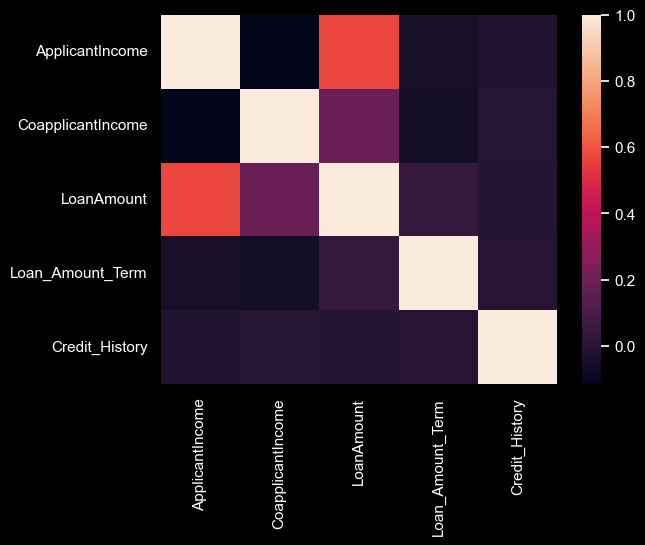

In [80]:
corr=loan_data.corr()
sns.heatmap(corr)
plt.show()

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [81]:
#How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

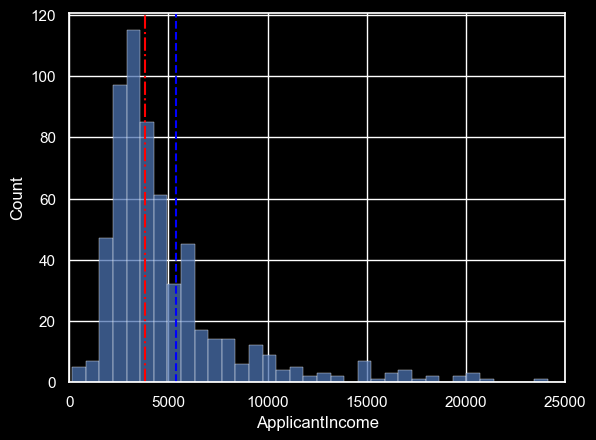

In [82]:
#Is the `ApplicantIncome` distribution in line with your expectation? 
#Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

fig, ax = plt.subplots()
sns.histplot(loan_data['ApplicantIncome'],ax=ax)
plt.axvline(loan_data['ApplicantIncome'].mean(), 
            color='blue', 
            linestyle='dashed', 
            linewidth=1.5,
            label='mean')
plt.axvline(loan_data['ApplicantIncome'].median(), 
            color='red', 
            linestyle='dashdot', 
            linewidth=1.5,
            label='median')
ax.set_xlim(0,25000)
plt.show()

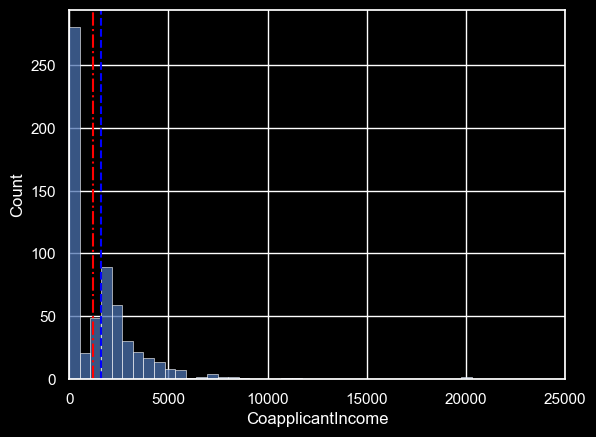

In [83]:
#Similarly, what about `CoappliCoapplicantIncome
fig, ax = plt.subplots()
sns.histplot(loan_data['CoapplicantIncome'],ax=ax)
plt.axvline(loan_data['CoapplicantIncome'].mean(), 
            color='blue', 
            linestyle='dashed', 
            linewidth=1.5,
            label='mean')
plt.axvline(loan_data['CoapplicantIncome'].median(), 
            color='red', 
            linestyle='dashdot', 
            linewidth=1.5,
            label='median')
ax.set_xlim(0,25000)
plt.show()

### Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [84]:
#seperating numerical and categorical 
num_columns = list(loan_data.dtypes[loan_data.dtypes != 'object'].index)

cat_columns = list(loan_data.dtypes[df.dtypes == 'object'].index)
cat_columns.remove('Loan_ID')

In [85]:
for i in cat_columns:
    n=(loan_data[i].value_counts())
    print(n)
    print('\n')

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Y    422
N    192
Name: Loan_Status, dtype: int64




Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

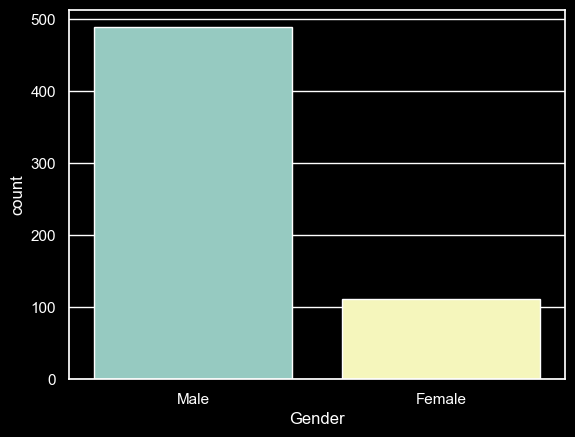

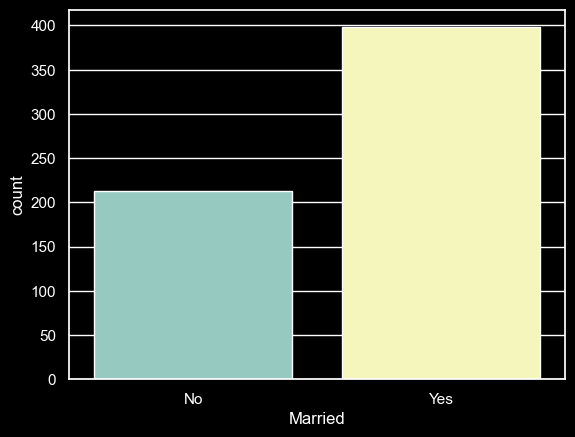

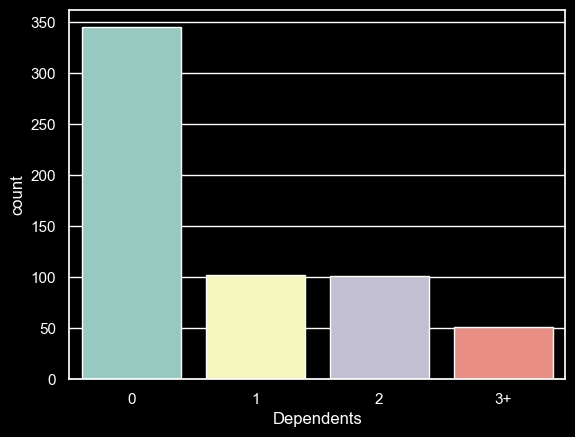

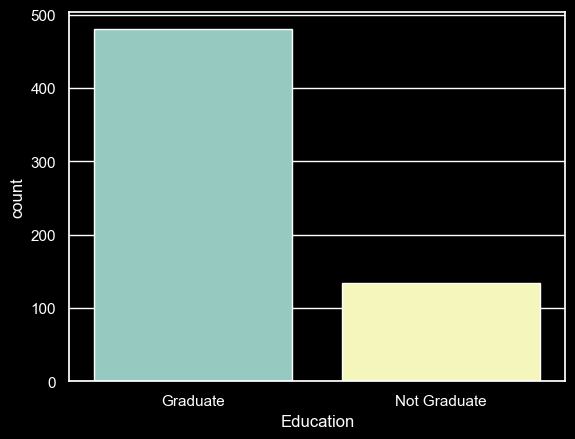

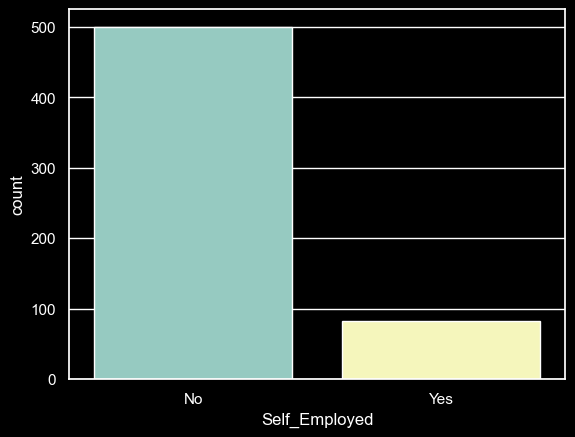

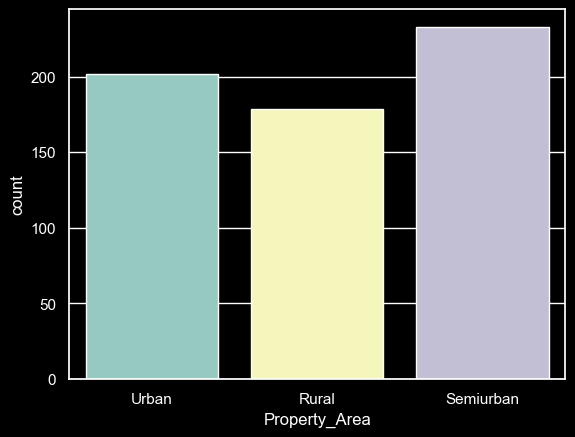

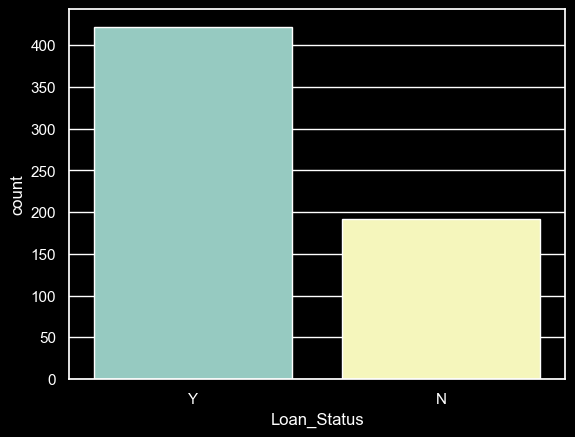

In [86]:
for columns in cat_columns:
    sns.countplot(x=loan_data[columns])
    plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



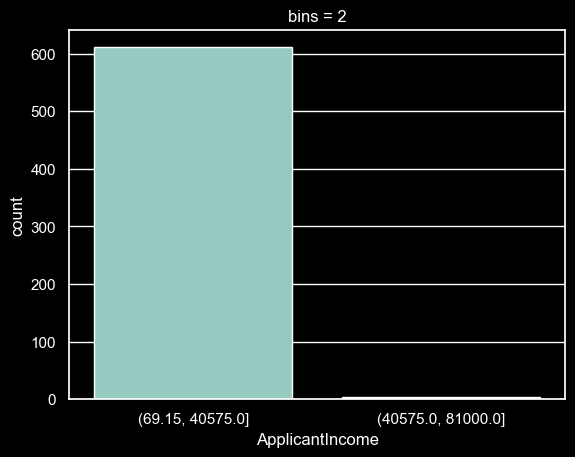

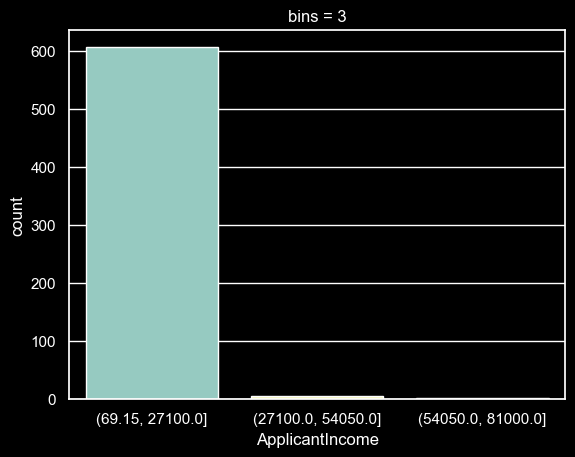

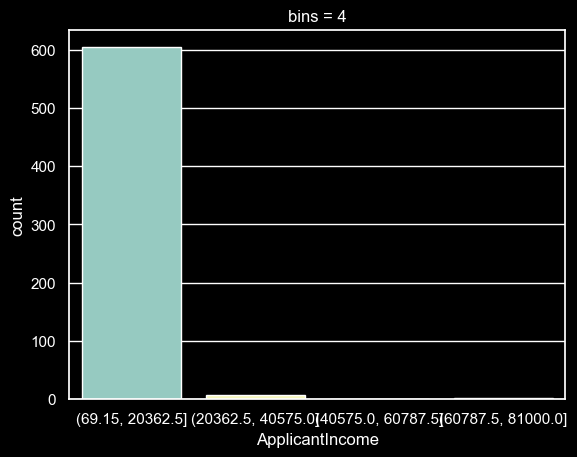

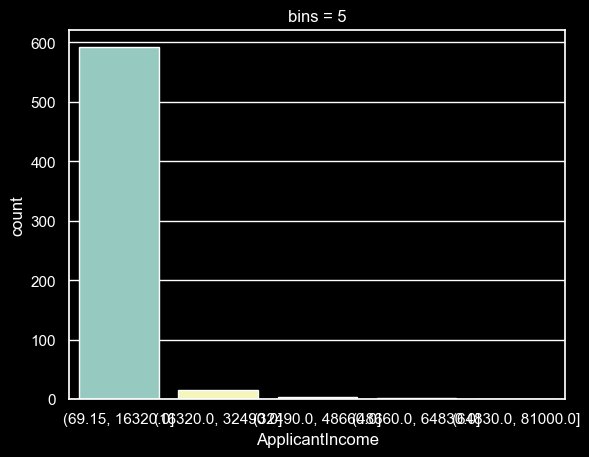

In [87]:
#different bins with for loop
for i in [2,3,4,5]:
    sns.countplot(x=pd.cut(df['ApplicantIncome'],bins=i)).set_title('bins = {}'.format(i))
    plt.show()




#### Look at box plots to understand the distributions. 

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'ApplicantIncome'),
  Text(2, 0, 'CoapplicantIncome'),
  Text(3, 0, 'LoanAmount'),
  Text(4, 0, 'Loan_Amount_Term'),
  Text(5, 0, 'Credit_History')])

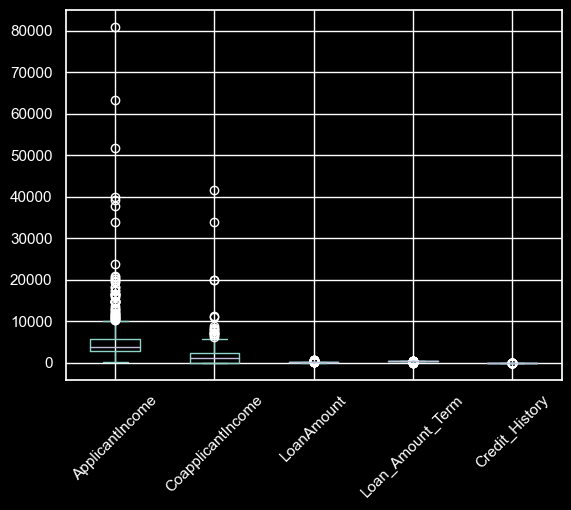

In [88]:
#boxplot for numerical features
l=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df_box = loan_data[l]
df_box.plot(kind='box')
plt.xticks(rotation=45)

In [89]:
#boxplots in seperated figs.
#for i in num_columns:
    #sns.boxplot(x=loan_data[i], data=loan_data)
    #plt.show()

### Look at the distribution of income segregated  by `Education`

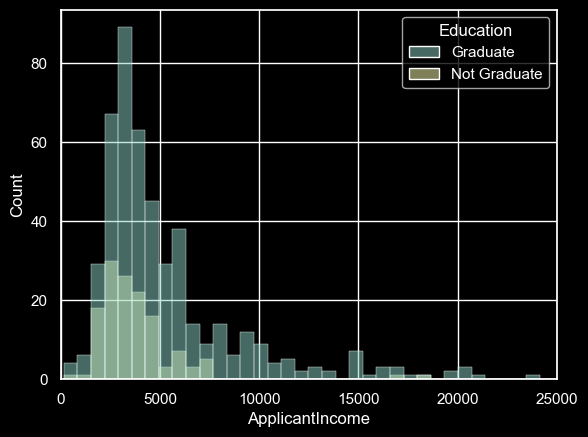

In [90]:
#histogram for 'ApplicantIncome'
fig, ax = plt.subplots()
sns.histplot(x=loan_data['ApplicantIncome'],hue=loan_data['Education'])
ax.set_xlim(0,25000)
plt.show()

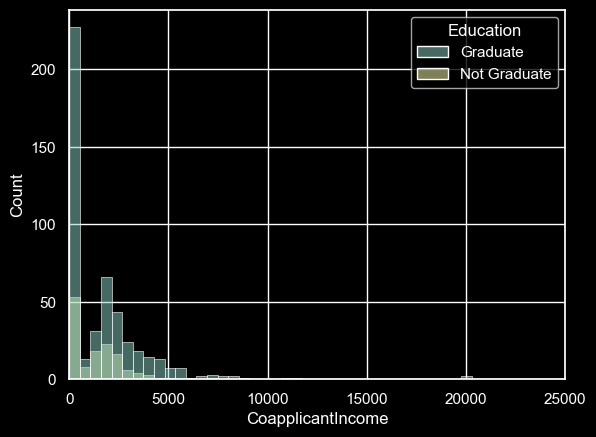

In [91]:
#histogram for 'CoApplicantIncome'
fig, ax = plt.subplots()
sns.histplot(x=loan_data['CoapplicantIncome'],hue=loan_data['Education'])
ax.set_xlim(0,25000)
plt.show()

### Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

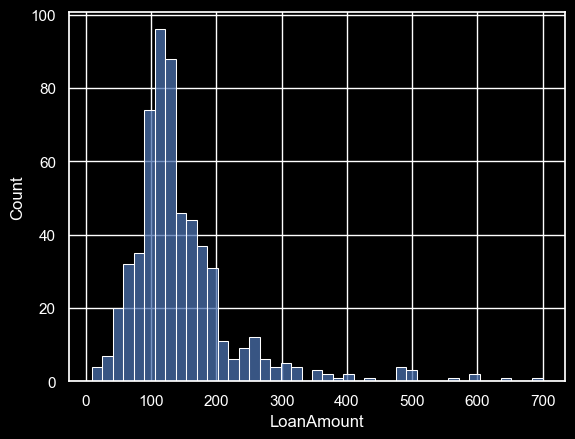

In [92]:
#histogram of LoanAmount
sns.histplot(x=df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

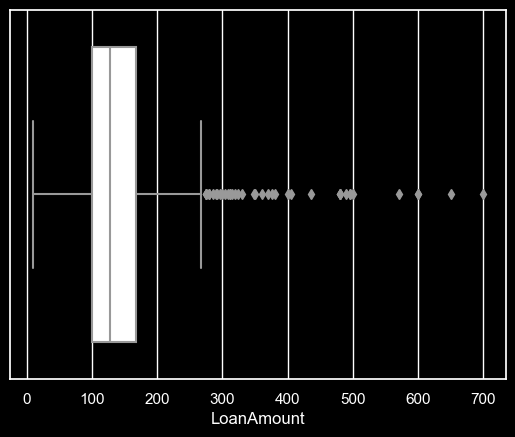

In [93]:
#boxplot of 'LoanAmount'

sns.boxplot(x='LoanAmount',data=df, color= 'w')

### Further EDA

['0' '1' '2' '3+' nan]
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


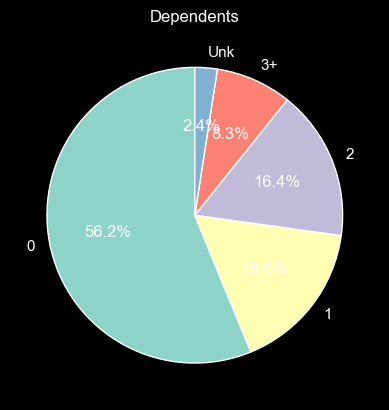

In [94]:
print(loan_data.Dependents.unique())
print(loan_data.Dependents.value_counts())
plt.pie([345,102,101,51,15],labels=["0","1","2","3+",'Unk'], autopct='%1.1f%%',startangle=90);
plt.title("Dependents");
sns.set(font_scale=1.0); #edited as suggested

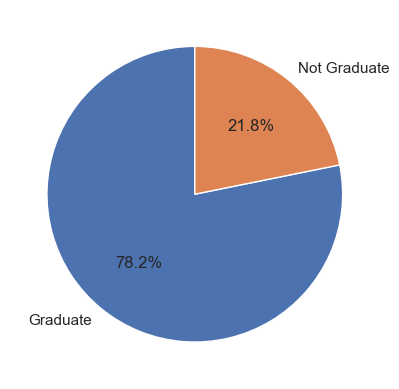

In [95]:
df.Education.unique()
df.Education.value_counts()
plt.pie([480,134],labels=['Graduate','Not Graduate'], autopct='%1.1f%%',startangle=90);
#plt.savefig('Education_pie.png')

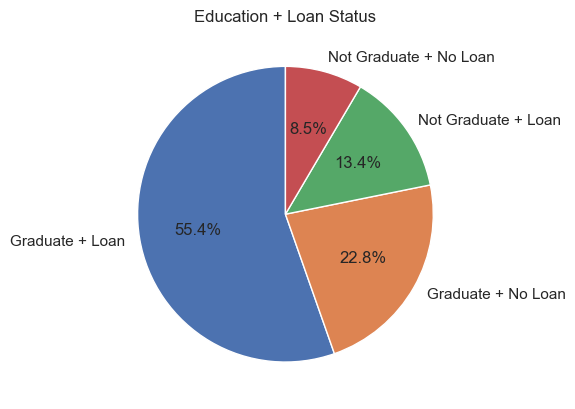

In [96]:
plt.pie([340,140,82,52],labels=["Graduate + Loan","Graduate + No Loan","Not Graduate + Loan","Not Graduate + No Loan"], autopct='%1.1f%%',startangle=90);
plt.title("Education + Loan Status");
sns.set(font_scale=1.0);

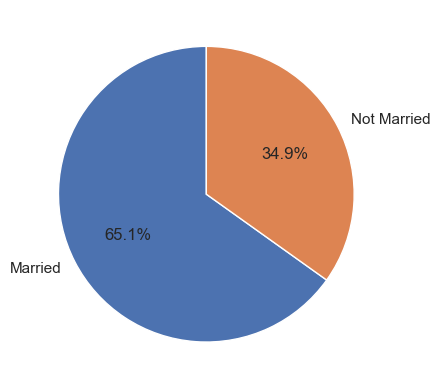

In [97]:
df.Married.unique()
df.Married.value_counts()
plt.pie([398,213],labels=['Married','Not Married'], autopct='%1.1f%%',startangle=90);
#plt.savefig('Education_pie.png')

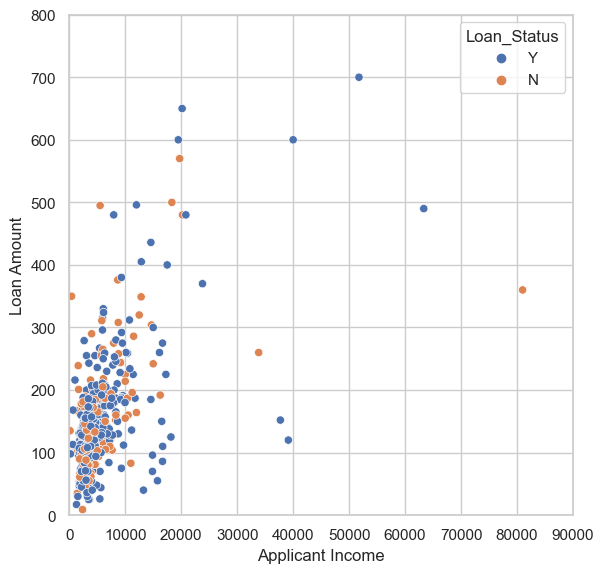

In [98]:
sns.set_theme(style="whitegrid");
f, ax = plt.subplots(figsize=(6.5, 6.5));
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, ax=ax);
ax.set_xlim(0,90000);
ax.set_ylim(0,800);
ax.set_xlabel('Applicant Income');
ax.set_ylabel('Loan Amount');

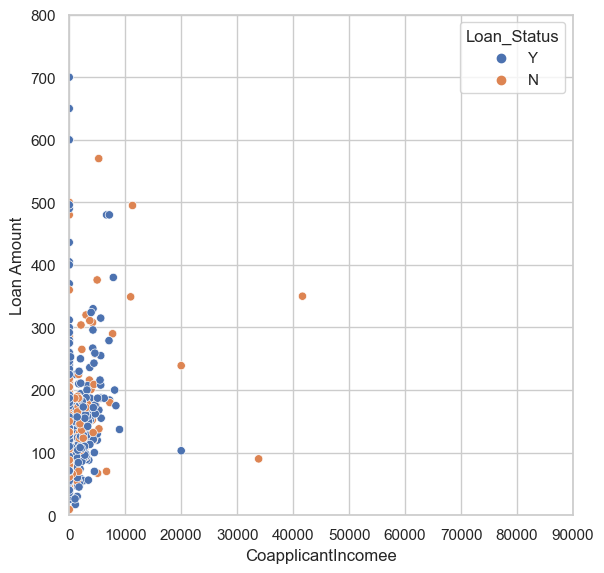

In [99]:
sns.set_theme(style="whitegrid");
f, ax = plt.subplots(figsize=(6.5, 6.5));
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, ax=ax);
ax.set_xlim(0,90000);
ax.set_ylim(0,800);
ax.set_xlabel('CoapplicantIncomee');
ax.set_ylabel('Loan Amount');

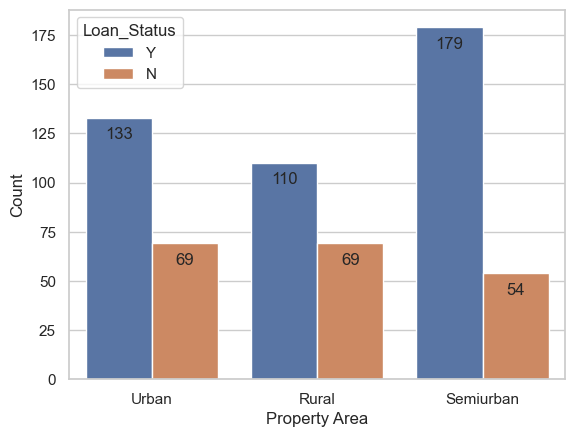

In [100]:
fig, ax = plt.subplots();
splot = sns.countplot(x='Property_Area', hue='Loan_Status', data=df, ax=ax);
ax.set_xlabel('Property Area');
ax.set_ylabel('Count');
for p in splot.patches:
    splot.annotate(format(p.get_height(), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points');
plt.savefig('PropertyArea_LoanStatus_bar.png');

### There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [101]:
#pandas.DataFrame.pivot_table

dpivot= pd.pivot_table(df,values='LoanAmount',index=['Education','Self_Employed'],columns='Credit_History')
dpivot

Credit_History                     0.0         1.0
Education    Self_Employed                        
Graduate     No             151.039216  148.332226
             Yes            179.000000  177.479167
Not Graduate No             125.545455  111.591549
             Yes            161.500000  126.615385

<AxesSubplot:xlabel='LoanAmount', ylabel='Married'>

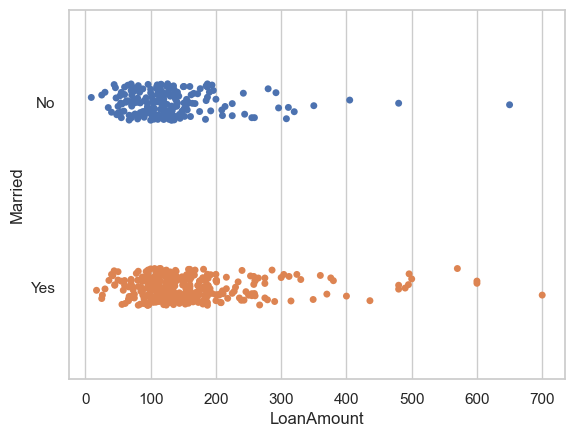

In [102]:
#LoanAmount saperated by Marital Status
sns.stripplot(x='LoanAmount',y='Married',data=loan_data)

<AxesSubplot:xlabel='LoanAmount', ylabel='Gender'>

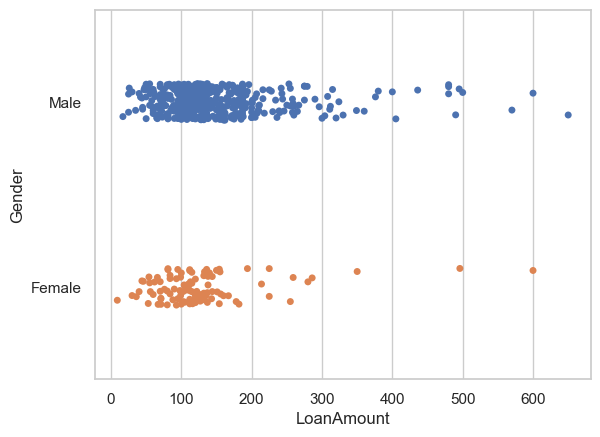

In [103]:
#LoanAmount saperated by Gender
sns.stripplot(x='LoanAmount',y='Gender',data=loan_data)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

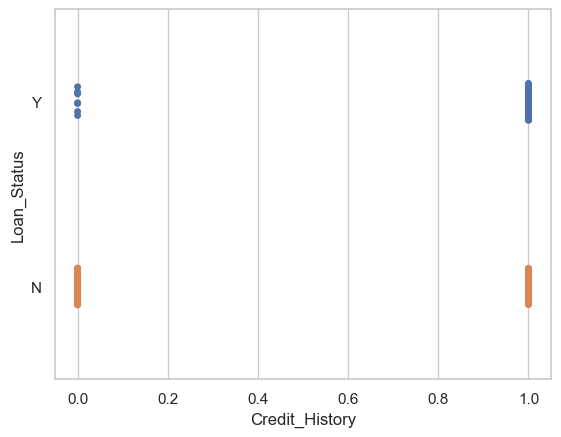

In [104]:
#Loan_Status based on Credit_History
sns.stripplot(x='Credit_History',y='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

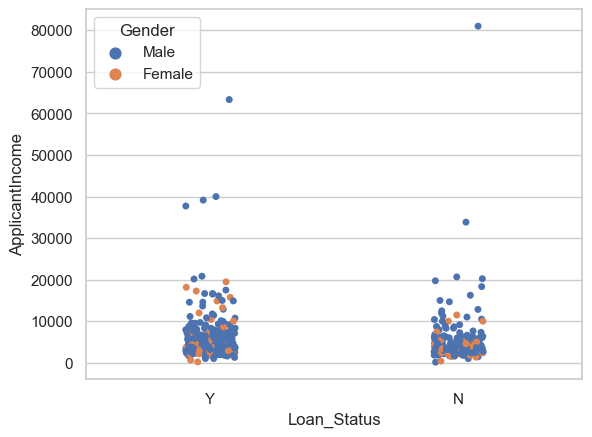

In [105]:
#Loan_Status for different ApplicantIncome and Gender
sns.stripplot(x='Loan_Status',y='ApplicantIncome',hue='Gender',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

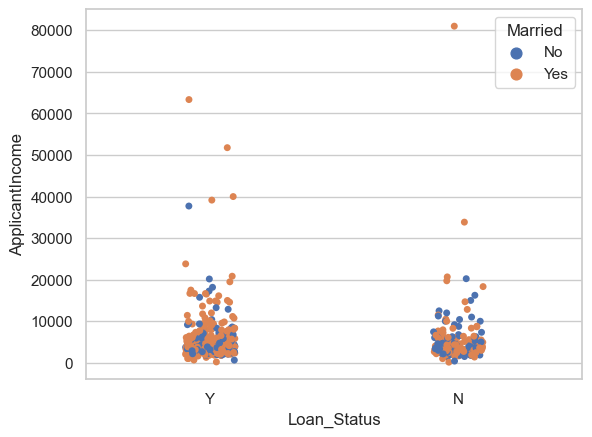

In [106]:
#Loan_Status for different ApplicantIncome and Marital Status
sns.stripplot(x='Loan_Status',y='ApplicantIncome',hue='Married',data=df)

# 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [107]:
missing=loan_data.isnull().sum()
missing

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [109]:
loan_data['Credit_History'].isna().sum()

50

In [110]:
#because mode of 'Credit_History' is 1 so we impute its missings with its mode
loan_data['Credit_History']=loan_data['Credit_History'].fillna(loan_data['Credit_History'].value_counts().idxmax())
loan_data['Credit_History'].isna().sum()


0

In [111]:
loan_data['Self_Employed'].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [112]:
#because mode of 'Self_Employed' is 'No' so we impute its missings with its mode
loan_data['Self_Employed']=loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].value_counts().idxmax())
loan_data['Self_Employed'].isna().sum()

0

In [113]:
loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [114]:
#loan_data['Dependents'][loan_data['Dependents']=='3+']='3'

#loan_data['Dependents'].value_counts()


In [115]:
#because mode of 'Dependents' is 0 so we impute its missings with its mode
loan_data['Dependents']=loan_data['Dependents'].fillna(loan_data['Dependents'].value_counts().idxmax())
loan_data['Dependents'].isna().sum()

0

In [116]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [117]:
#because mode of 'Loan_Amount_Term' is 360 so we impute its missings with its mode
loan_data['Loan_Amount_Term']=loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].value_counts().idxmax())
loan_data['Loan_Amount_Term'].isna().sum()

0

In [118]:
loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [119]:
#because mode of 'Gender' is 'Male' so we impute its missings with its mode
loan_data['Gender']=loan_data['Gender'].fillna(loan_data['Gender'].value_counts().idxmax())
loan_data['Gender'].isna().sum()

0

In [120]:
loan_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [121]:
#because mode of 'Married' is 'Yes' so we impute its missings with its mode
loan_data['Married']=loan_data['Married'].fillna(loan_data['Married'].value_counts().idxmax())
loan_data['Gender'].isna().sum()

0

In [122]:
loan_data['LoanAmount']=loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(skipna = True))
loan_data['LoanAmount'].isna().sum()
# rolling mean:
# loan_data['LoanAmount']=loan_data['LoanAmount'].rolling(6,min_periods=1).mean()

0

In [123]:
loan_data.isnull().sum()
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [124]:
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [125]:

def encode_transform(df):
    #Convert object data type to numeric
    gender_stat = {"Female": 0, "Male": 1}
    yes_no_stat = {'No' : 0,'Yes' : 1}
    dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
    education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
    property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
    
    df['Gender']        = df['Gender'].replace(gender_stat)
    df['Married']       = df['Married'].replace(yes_no_stat)
    df['Dependents']    = df['Dependents'].replace(dependents_stat)
    df['Education']     = df['Education'].replace(education_stat)
    df['Self_Employed'] = df['Self_Employed'].replace(yes_no_stat)
    df['Property_Area'] = df['Property_Area'].replace(property_stat)
    
    # Convert object to numerics
    df['Dependents'] = pd.to_numeric(df['Dependents'])

    #loan_data['Loan_Amount_Term']=pd.to_numeric(loan_data['Loan_Amount_Term']).convert_dtypes()   :change to int
    #loan_data['Loan_Amount_Term']=pd.to_numeric(loan_data['Loan_Amount_Term'])                    :change to float
    
    return df

In [126]:
loan_train=encode_transform(loan_data)
loan_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,N
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,1,Y
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,1,Y
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,0,N
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,1,Y
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,0,N


In [127]:
loan_train.info()
#loan_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [128]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

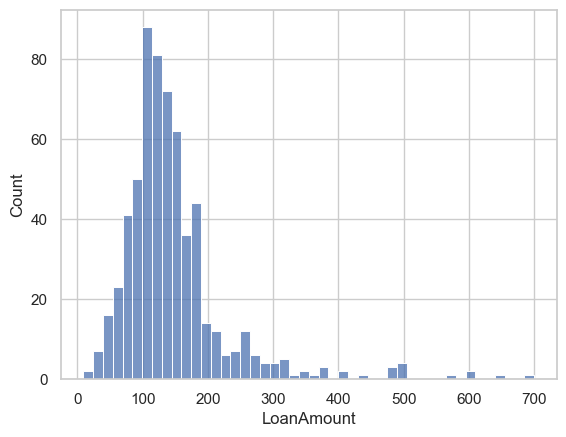

In [129]:
# Befor log transform 
sns.histplot(loan_train['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

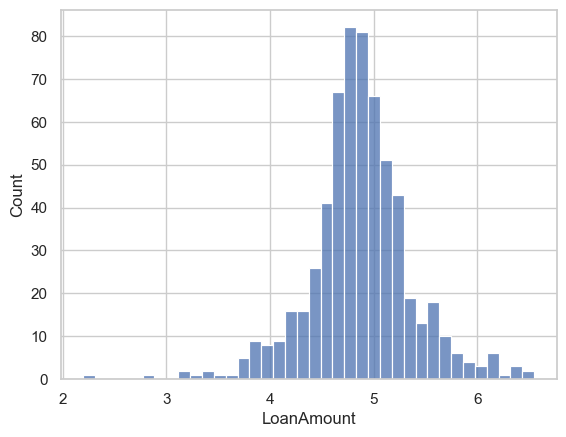

In [130]:
LoanAmount_log = np.log(loan_train['LoanAmount'])
sns.histplot(LoanAmount_log)

### Combine both incomes as total income and take a log transformation of the same.

<AxesSubplot:ylabel='Count'>

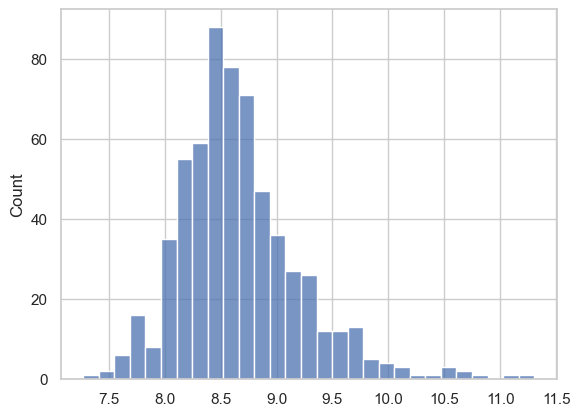

In [131]:
total_income = loan_train['ApplicantIncome']+ loan_train['CoapplicantIncome']
total_income_log = np.log(total_income)
sns.histplot(total_income_log)

## 4. Building a Predictive Model

In [132]:
# Importing useful libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [133]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')



In [134]:
# Determine X and y, split into Test and Train sets

X = loan_train.drop(columns=['Loan_Status','Loan_ID'])
y = loan_train['Loan_Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2013)

In [332]:
#make variabel to save the result and to show it
classifier = ('LogisticRegression','Gradient Boosting','XGBoost', 'Random Forest','Decision Tree','K-Nearest Neighbor','SVM')


In [333]:
clf = LogisticRegression()
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

0.8029454884712782

The accuration of classification is 80.29%


In [334]:
#second meyhod
LGR = LogisticRegression()
pred = cross_val_predict(LGR, X, y, cv=5)
print(confusion_matrix(y, pred))
print(accuracy_score(y, pred))


[[ 88 104]
 [ 17 405]]
0.8029315960912052


In [335]:
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

0.7801146208183394

The accuration of classification is 78.01%


In [336]:
#second method
GBC = GradientBoostingClassifier()
pred = cross_val_predict(GBC, X, y, cv=5)
print(confusion_matrix(y, pred))
print(accuracy_score(y, pred))

[[ 90 102]
 [ 33 389]]
0.7801302931596091


In [337]:
clf = XGBClassifier()
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

nan

The accuration of classification is nan%


In [338]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

0.7540317206450753

The accuration of classification is 75.40%


In [339]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

0.6987604958016793

The accuration of classification is 69.88%


In [340]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

0.6140077302412368

The accuration of classification is 61.40%


In [341]:
clf  =  svm.LinearSVC(max_iter=5000)
scores = cross_val_score(clf, X, y,cv=5)
scores.mean()
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

0.6531654005064642

The accuration of classification is 65.32%


### Making Pickle

In [346]:
import pickle

best_model = LGR
best_model.fit(X,y)

pkl_filename = 'loan_approval_model.pkl'
pickle.dump(best_model, open(pkl_filename, 'wb'))

LogisticRegression()

### Build Pipelines

In [141]:
import pandas as pd
from sklearn.pipeline import Pipeline, FeatureUnion
# numerical preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
# categorical preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
# models?
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv("data.csv")
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

for col in cat_feats:
    df[col] = df[col].astype('category')
    
cat_feats.remove('Loan_Status') 
cat_feats.remove("Loan_ID") 

X = df.drop(columns=['Loan_Status','Loan_ID'])
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2013)

In [142]:
# create new column given df
def totalIncome(dataset):
    dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
    return dataset

# allow function transformation on df column
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

# log transform
def LogTransform(dataset):
    dataset = dataset.assign(log_TotalIncome = np.log1p(dataset['TotalIncome']))
    dataset = dataset.assign(log_LoanAmount = np.log1p(dataset['LoanAmount']))
    dataset = dataset.drop(columns=['TotalIncome','LoanAmount'])
    return dataset

# don't forget ToDenseTransformer after one hot encoder
class ToDenseTransformer():
    def transform(self, X, y=None, **fit_params):
        return X.todense()
    def fit(self, X, y=None, **fit_params):
        return self

# select specific columns to perform pipeline onto
class SelectColumnsTransformer():
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X, **transform_params):
        cpy_df = X[self.columns].copy()
        return cpy_df

    def fit(self, X, y=None, **fit_params):
        return self

In [143]:
# Pre-processing Pipelines

# NUMERICAL --> select k best columns to be tuned later
nullnumTransform = ColumnTransformer([
    ('impute_zero', SimpleImputer(strategy='constant', fill_value=0), ['Credit_History','log_LoanAmount']), # if empty, assume not-applicable = 'No'
    ('impute_mean', SimpleImputer(strategy='mean'), ['Loan_Amount_Term'])], remainder='passthrough') # assume average loan information if not given
## scale other columns; do not need treatment for 0/1 columns like Credit_History
scalerTransform = ColumnTransformer([('std_scaler', StandardScaler(), [0,1,2])], remainder='passthrough')
## put numerical pre-processing together
numerical = Pipeline([
    ('totalincome', DataframeFunctionTransformer(totalIncome)),
    ('logtransform', DataframeFunctionTransformer(LogTransform)),
    ('selector', SelectColumnsTransformer(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History','log_TotalIncome','log_LoanAmount'])),
    ('null_fill', nullnumTransform),
    ('standard_scaler', scalerTransform),
    ('kbest', SelectKBest(k=3))])

# CATEGORICAL --> PCA 3 components to be tuned later - different columns need different NaN treatments
nullcatTransform = ColumnTransformer([
    ('impute_no', SimpleImputer(strategy='constant', fill_value='No'), ['Married','Self_Employed']), # if empty, assume not-applicable = 'No'
    ('impute_zero', SimpleImputer(strategy='constant', fill_value='0'), ['Dependents']), # needs to be string of numbers: '0', '1', '2' or '3+'
    ('impute_mode', SimpleImputer(strategy='most_frequent'), ['Gender'])], remainder='passthrough') # no way to otherwise tell, give most common gender back
## put categorical pre-processing together
categorical = Pipeline([
    ('selector', SelectColumnsTransformer(cat_feats)),
    ('null_fill', nullcatTransform),
    ('encode', OneHotEncoder()),
    ('to_dense',ToDenseTransformer()),
    ('pca', PCA(n_components=3))])

# define which transformer applies to which columns
preprocess = FeatureUnion([
    ('categorical', categorical),
    ('numerical', numerical)])

In [144]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression())])

In [145]:
from sklearn import set_config
set_config(display='diagram')
pipeline.fit(X_train, y_train)
print("model score: %.2f%%" % (pipeline.score(X_test, y_test)*100))

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('categorical',
                                                 Pipeline(steps=[('selector',
                                                                  <__main__.SelectColumnsTransformer object at 0x0000018A6D7BD400>),
                                                                 ('null_fill',
                                                                  ColumnTransformer(remainder='passthrough',
                                                                                    transformers=[('impute_no',
                                                                                                   SimpleImputer(fill_value='No',
                                                                                                                 strategy='constant'),
                                                                                                   ['Married',
                                                                                                    'Self_Employed']),
                                                                                                  ('impute_zero',
                                                                                                   Simple...
                                                                                    transformers=[('impute_zero',
                                                                                                   SimpleImputer(fill_value=0,
                                                                                                                 strategy='constant'),
                                                                                                   ['Credit_History',
                                                                                                    'log_LoanAmount']),
                                                                                                  ('impute_mean',
                                                                                                   SimpleImputer(),
                                                                                                   ['Loan_Amount_Term'])])),
                                                                 ('standard_scaler',
                                                                  ColumnTransformer(remainder='passthrough',
                                                                                    transformers=[('std_scaler',
                                                                                                   StandardScaler(),
                                                                                                   [0,
                                                                                                    1,
                                                                                                    2])])),
                                                                 ('kbest',
                                                                  SelectKBest(k=3))]))])),
                ('model', LogisticRegression())])

model score: 80.49%


In [146]:
from sklearn.utils import estimator_html_repr

with open('model_pipeline.html', 'w') as f:  
    f.write(estimator_html_repr(pipeline))

31151

In [147]:
# Try paramater grid search to improve the results

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
import time

In [148]:
# Other Models
# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'preprocess__numerical__kbest__k': [1, 3, 5], 
              'preprocess__categorical__pca__n_components': [1, 3, 5],
              'model': [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), CategoricalNB(), XGBClassifier()]}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FeatureUnion(transformer_list=[('categorical',
                                                                        Pipeline(steps=[('selector',
                                                                                         <__main__.SelectColumnsTransformer object at 0x0000018A6D7BD400>),
                                                                                        ('null_fill',
                                                                                         ColumnTransformer(remainder='passthrough',
                                                                                                           transformers=[('impute_no',
                                                                                                                          SimpleImputer(fill_value='No',
                                                                                                                                        strategy='constant'),
                                                                                                                          ['Married',
                                                                                                                           'Self_Emplo...
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...)],
                         'preprocess__categorical__pca__n_components': [1, 3,
                                                                        5],
                         'preprocess__numerical__kbest__k': [1, 3, 5]})

Best test set accuracy: 0.8211382113821138
Achieved with hyperparameters: {'model': LogisticRegression(), 'preprocess__categorical__pca__n_components': 1, 'preprocess__numerical__kbest__k': 1}


### 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [150]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [352]:
# Read pickle file
pkl_filename = 'loan_approval_model.pkl'
with open(pkl_filename, "rb" ) as f:
    trained_model = pickle.load (f)

In [5]:

json_data =[
    {
        "Gender": "Male",
        "Married": "No",
        "Dependents": "3+",
        "Education": "Not Graduate",
        "Self_Employed": "No",
        "ApplicantIncome": 5849,
        "CoapplicantIncome": 0.0,
        "LoanAmount": 300.0,
        "Loan_Amount_Term": 24.0,
        "Credit_History": 1.0,
        "Property_Area": "Rural"
    }
]

In [ ]:
query = [{
        "Loan_ID": "LP001001",
        "Gender": "Male",
        "Married": "No",
        "Dependents": "3+",
        "Education": "Not Graduate",
        "Self_Employed": "No",
        "ApplicantIncome": 5849,
        "CoapplicantIncome": 0.0,
        "LoanAmount": 300.0,
        "Loan_Amount_Term": 24.0,
        "Credit_History": 1.0,
        "Property_Area": "Rural"}]

## Local Server Test

In [8]:
# Local Server Test
import requests
URL = "http://10.0.0.195:5000/predict"

# sending get request and saving the response as response object 
result = requests.post(url = URL, json = json_data) 
result


<Response [200]>

In [4]:
print(result.json())

{'Result ': 'Loan IS approved.'}


## Online Server Test

In [9]:
# Online Server Test
import requests
URL = "http://ec2-3-96-167-34.ca-central-1.compute.amazonaws.com:5000/predict"

# sending get request and saving the response as response object 
result = requests.post(url = URL, json = json_data) 
result

<Response [200]>

In [360]:
print(result.json())

{'Result ': 'Loan IS approved.'}
